# **Homework 5 (21 points)**

#### **Dylan Watson**


For this assignment, I would like you to complete Tasks 1 through 3 of the project. I have included these tasks below

<br>

---

<br>

Please follow the directions below carefully:

- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Comment all code using the `#`. This is a must!
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed project must be submitted to Canvas as a .ipynb file by the assigned due date**



<br>

---

<br>






## Data

Data for the project is available [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv). A data dictionary describing the meaning of each of the variables in the dataset is available in the Project module in Canvas.

<br>

---

<br>






## Introduction

Chronic obstructive pulmonary disease (COPD) affects over 16 million Americans and is the fourth leading cause of death in the United States behind heart disease, cancer, and accidental death. While COPD can result from various toxic inhalations or asthma, it is most commonly associated with cigarette smoking.

<br>

COPD severity is typically measured by a device called a spirometer. Patients forcefully exhale into the device and the volume of air exhaled is used as a measure for the severity of disease (less air exhaled $\Rightarrow$ worse disease). Data collected by the COPDGene research group includes spirometry data on thousands of research participants.

<br>

Spirometry measures in the dataset:
* The forced expiratory volume (`FEV1`) is the volume of air exhaled in 1 second
* The forced vital capacity (`FVC`) is the total volume of air exhaled after a full breath
* `FEV1_FVC_ratio` is the ratio between `FEV1` and `FVC` (smaller $\Rightarrow$ worse disease)
* `FEV1_phase2` is the `FEV1` of research participants 5 years later

<br>

You overall task in this project is to analyze the relationship between FEV1 at follow-up `FEV1_phase2` and other variables in the dataset. The project has been organized into a series of tasks to assist you with your analysis organization.

<br>

---

<br>






####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 1</font> (6 points)

1. Load the COPDGene dataset and show the first few lines.
2. Remove the NAs from the dataset and store as `dat1`. How many rows does `dat1` contain? Answer in a complete sentence.
3. Select all rows in the dataset where `FEV1_phase2` is `NA` and store as `dat2`. How many rows does `dat2` contain? Answer in a complete sentence.


In [1]:
url = "https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv"
copd = read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv")
head(copd)
nrow(copd)
dat1 = na.omit(copd)
nrow(dat1)
dat2 = copd[copd$FEV1_phase2 == "NA",]
nrow(dat2)

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
2,10006S,2008,1/15/2008,62.3,Female,White,162.6,86.0,170,80,⋯,5.2325,14.005900,-1.0000,-1.00000,-841.880,-1.000,0.43,1.288,3.022,NA
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924


[1] 5747

[1] 4000

[1] 1747

Before removing the rows containing NA, there were 5747 rows. After cleaning there were 4000 rows remaining. This is checked by verifying in dat2 that there are 1747 rows containing NA in FEV1_phase2.

<br>

---

<br>






####<font color=red>Task 2</font> (8 points)

1. From `dat1`, plot the histogram of `FEV1`
2. Calculate the percentage of `FEV1` values within one standard deviation of its mean. Answer in a complete sentence.
3. Calculate the percentage of `FEV1` values within 2 standard deviations of its mean. Answer in a complete sentence.
4. Use your answers from 2.1-2.3 to determine if the FEV1 variable is approximately normally distributed.


[1] 0.67575

[1] 0.9675

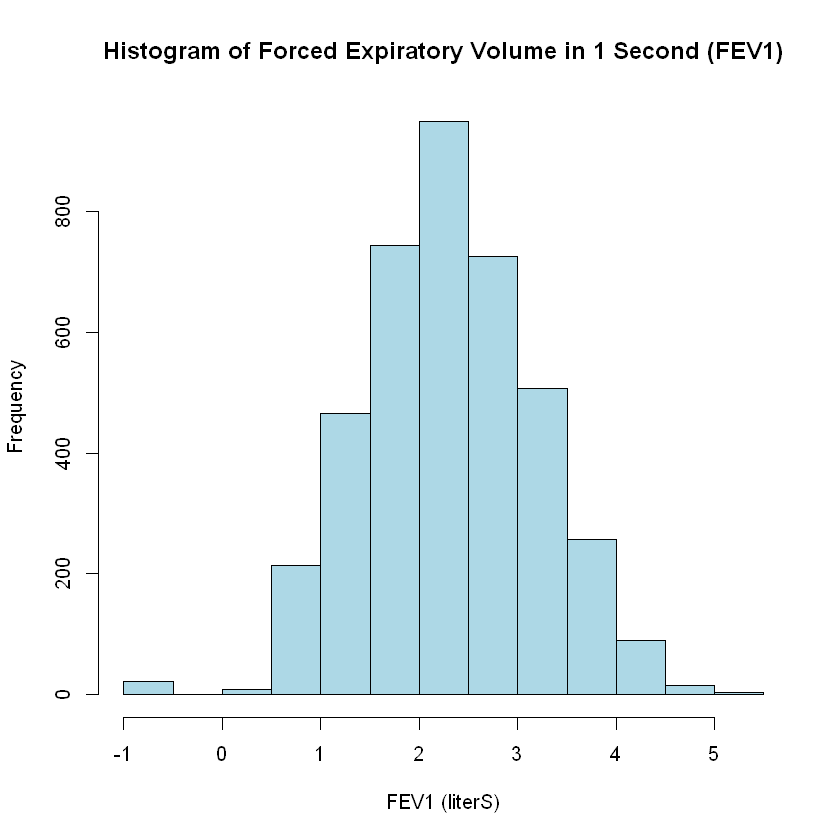

In [2]:
hist(dat1$FEV1, main = "Histogram of Forced Expiratory Volume in 1 Second (FEV1)", xlab = "FEV1 (literS)", ylab = "Frequency", col = "lightblue", border = "black")
FEV1_sd = sd(dat1$FEV1)
FEV1_mean = mean(dat1$FEV1)
within_1sd = sum( (dat1$FEV1 < (FEV1_mean + FEV1_sd) ) & (dat1$FEV1 > (FEV1_mean - FEV1_sd) ) ) / nrow(dat1)
within_1sd
within_2sd = sum( (dat1$FEV1 < (FEV1_mean + FEV1_sd * 2) ) & (dat1$FEV1 > (FEV1_mean - FEV1_sd * 2) ) ) / nrow(dat1)
within_2sd

The percentage of values within 1 standard deviation of the mean is 67.58% and within 2 std dev is 96.75%. This combined with the distribution shown by the histogram would show that the values of FEV1 are approximately normally distributed. 

<br>

---

<br>






####<font color=red>Task 3</font> (6 points)

1. From `dat1`, find two other numeric variables and plot their histograms.
2. Describe the histogram of the FIRST variable you chose.
    * Range, standard deviation, skewness or symmetry, mean, normally distributed, outlier observations etc.
    * You may use R functions to help you answer and describe the distribution
    * Answer in complete sentences in a paragraph
3. Describe the histogram of the SECOND variable you chose.
    * Range, standard deviation, skewness or symmetry, mean, normally distributed, outlier observations etc.
    * You may use R functions to help you answer and describe the distribution
    * Answer in complete sentences in a paragraph

[1] "Mean FVC:  3.32868775"
[1] "Median FVC:  3.2335"
[1] "SD FVC:  1.01720299288398"
[1] "Range FVC:  -1  -  6.936"
[1] "Mean FEV1_FVC_ratio:  0.68047"
[1] "Median FEV1_FVC_ratio:  0.73"
[1] "SD FEV1_FVC_ratio:  0.187180763593818"
[1] "Range FEV1_FVC_ratio:  -1  -  1"


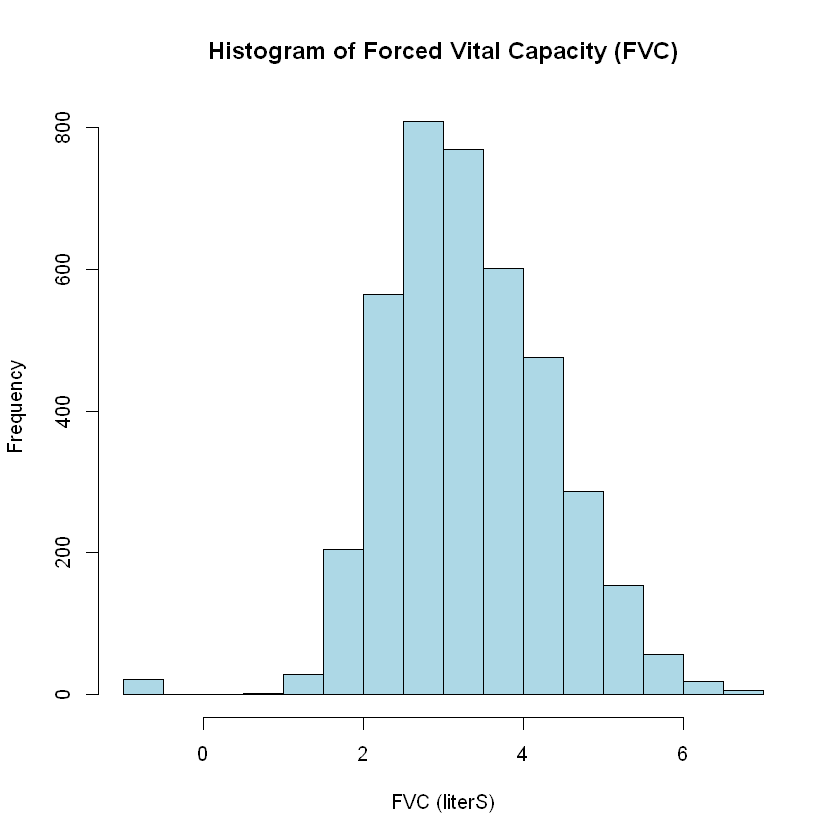

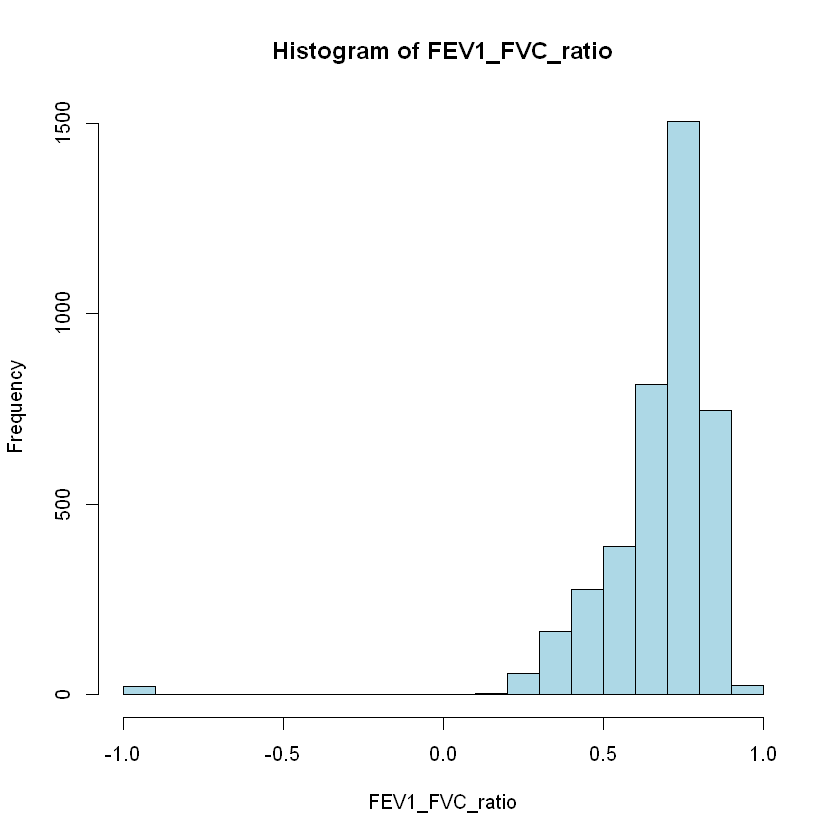

In [3]:
print(paste("Mean FVC: ",mean(dat1$FVC)))
print(paste("Median FVC: ",median(dat1$FVC)))
print(paste("SD FVC: ",sd(dat1$FVC)))
print(paste("Range FVC: ",min(dat1$FVC)," - ", max(dat1$FVC)))
hist(dat1$FVC, main = "Histogram of Forced Vital Capacity (FVC)", xlab = "FVC (literS)", ylab = "Frequency", col = "lightblue", border = "black")
print(paste("Mean FEV1_FVC_ratio: ",mean(dat1$FEV1_FVC_ratio)))
print(paste("Median FEV1_FVC_ratio: ",median(dat1$FEV1_FVC_ratio)))
print(paste("SD FEV1_FVC_ratio: ",sd(dat1$FEV1_FVC_ratio)))
print(paste("Range FEV1_FVC_ratio: ",min(dat1$FEV1_FVC_ratio)," - ", max(dat1$FEV1_FVC_ratio)))
hist(dat1$FEV1_FVC_ratio, breaks = 20, main = "Histogram of FEV1_FVC_ratio", xlab = "FEV1_FVC_ratio", ylab = "Frequency", col = "lightblue", border = "black")

The histogram of FVC is mostly approximately normal with a possible light right skew. It has a mean of 3.33, median of 3.23, sd of 1.02, and a range between -1 and 6.936 liters vol.

The histogram of FEV1_FVC_ratio is left skewed and not approx normal. It has a mean of 0.68, median of 0.73, sd of 0.19, and range between -1 and 1. 